### Building Models with some of most inportant data

In [1]:
import pandas as pd
import numpy as np

In [2]:
adult = pd.read_csv('adult.csv')

In [3]:
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Missing values are marked as ?

In [4]:
def print_unique(data, print_non_numeric = False, from_columns = [], missing_value = '?'):
    if len(from_columns) == 0:
        for column in data:
            missing_count = data[column][data[column] == '?'].shape[0]
            if print_non_numeric:
                if data[column].dtype == 'object':
                    print(f'Column name = {column}, Length of unique data = {data[column].unique().shape[0]}, Column type = {data[column].dtype}, Amount of missing values ({missing_value}) = {missing_count}')
            else: 
                print(f'Column name = {column}, Length of unique data = {data[column].unique().shape[0]}, Column type = {data[column].dtype}, Amount of missing values ({missing_value}) = {missing_count}')
    
    else:
        for column in from_columns:
            if print_non_numeric:
                if data[column].dtype == 'object':
                    print(f'Column name = {column}, Length of unique data = {data[column].unique().shape[0]}, Column type = {data[column].dtype}, Amount of missing values ({missing_value}) = {missing_count}')
            else: 
                print(f'Column name = {column}, Length of unique data = {data[column].unique().shape[0]}, Column type = {data[column].dtype}, Amount of missing values ({missing_value}) = {missing_count}')


In [5]:
print_unique(adult, False)

Column name = age, Length of unique data = 74, Column type = int64, Amount of missing values (?) = 0
Column name = workclass, Length of unique data = 9, Column type = object, Amount of missing values (?) = 2799
Column name = fnlwgt, Length of unique data = 28523, Column type = int64, Amount of missing values (?) = 0
Column name = education, Length of unique data = 16, Column type = object, Amount of missing values (?) = 0
Column name = educational-num, Length of unique data = 16, Column type = int64, Amount of missing values (?) = 0
Column name = marital-status, Length of unique data = 7, Column type = object, Amount of missing values (?) = 0
Column name = occupation, Length of unique data = 15, Column type = object, Amount of missing values (?) = 2809
Column name = relationship, Length of unique data = 6, Column type = object, Amount of missing values (?) = 0
Column name = race, Length of unique data = 5, Column type = object, Amount of missing values (?) = 0
Column name = gender, Len

In [6]:
print_unique(adult, True)

Column name = workclass, Length of unique data = 9, Column type = object, Amount of missing values (?) = 2799
Column name = education, Length of unique data = 16, Column type = object, Amount of missing values (?) = 0
Column name = marital-status, Length of unique data = 7, Column type = object, Amount of missing values (?) = 0
Column name = occupation, Length of unique data = 15, Column type = object, Amount of missing values (?) = 2809
Column name = relationship, Length of unique data = 6, Column type = object, Amount of missing values (?) = 0
Column name = race, Length of unique data = 5, Column type = object, Amount of missing values (?) = 0
Column name = gender, Length of unique data = 2, Column type = object, Amount of missing values (?) = 0
Column name = native-country, Length of unique data = 42, Column type = object, Amount of missing values (?) = 857
Column name = income, Length of unique data = 2, Column type = object, Amount of missing values (?) = 0


In [7]:
percent_missing = adult['workclass'][adult['workclass'] == '?'].shape[0] / adult.shape[0]
print(f'Percent missing data = {str(round((percent_missing * 100), 2))}%')

Percent missing data = 5.73%


In [8]:
percent_missing = adult['occupation'][adult['occupation'] == '?'].shape[0] / adult.shape[0]
print(f'Percent missing data = {str(round((percent_missing * 100), 2))}%')

Percent missing data = 5.75%


In [9]:
percent_missing = adult['native-country'][adult['native-country'] == '?'].shape[0] / adult.shape[0]
print(f'Percent missing data = {str(round((percent_missing * 100), 2))}%')

Percent missing data = 1.75%


In [10]:
adult['native-country'].replace({'?' : np.nan}, inplace=True)
adult['workclass'].replace({'?' : np.nan}, inplace=True)
adult['occupation'].replace({'?' : np.nan}, inplace=True)

In [11]:
print_unique(adult, True)

Column name = workclass, Length of unique data = 9, Column type = object, Amount of missing values (?) = 0
Column name = education, Length of unique data = 16, Column type = object, Amount of missing values (?) = 0
Column name = marital-status, Length of unique data = 7, Column type = object, Amount of missing values (?) = 0
Column name = occupation, Length of unique data = 15, Column type = object, Amount of missing values (?) = 0
Column name = relationship, Length of unique data = 6, Column type = object, Amount of missing values (?) = 0
Column name = race, Length of unique data = 5, Column type = object, Amount of missing values (?) = 0
Column name = gender, Length of unique data = 2, Column type = object, Amount of missing values (?) = 0
Column name = native-country, Length of unique data = 42, Column type = object, Amount of missing values (?) = 0
Column name = income, Length of unique data = 2, Column type = object, Amount of missing values (?) = 0


In [12]:
adult.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
original_shape = adult.shape[0]
original_shape

48842

In [14]:
adult = adult.dropna()
print(str((adult.shape[0] / original_shape) * 100) + '%')

92.58834609557348%


In [15]:
adult.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12112,52,Private,261671,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,0,0,40,Vietnam,<=50K
45906,25,Private,372728,Bachelors,13,Never-married,Other-service,Not-in-family,Black,Female,0,0,24,Jamaica,<=50K
8302,59,Federal-gov,51662,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
28809,33,Private,133278,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,<=50K
48772,33,Private,63079,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


## From analysis of plots it can be noticed tht:

### Core variables are:
1. age
2. educational-num
3. gender
4. hours-per-week

### Important advanced variables are:
1. relationship
2. marital-status
3. occupation
4. fnlwgt
5. race
6. workclass

### Worthless variables are:
1. education
2. capital-gain
3. capital-loss
4. native-country	

In [17]:
adult = adult.drop(['education', 'capital-gain', 'capital-loss', 'native-country'], axis='columns')
adult.sample(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income
34966,51,Self-emp-not-inc,35295,9,Never-married,Farming-fishing,Unmarried,White,Male,45,<=50K
17507,36,Private,354078,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,>50K
35705,33,Private,168981,11,Never-married,Prof-specialty,Unmarried,White,Female,55,<=50K
14957,32,Private,72967,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,25,>50K
18116,23,Private,64292,9,Never-married,Adm-clerical,Not-in-family,White,Female,40,<=50K


### Data normalizing

In [18]:
adult['income'].replace({'>50K' : 1, '<=50K' : 0}, inplace=True)

In [19]:
adult['gender'].replace({'Male' : 1, 'Female' : 0}, inplace=True)

In [20]:
adult.sample(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income
28014,47,Private,223342,9,Divorced,Adm-clerical,Unmarried,White,0,35,0
21954,35,Private,112271,14,Married-civ-spouse,Adm-clerical,Husband,White,1,40,0
20268,37,Private,80638,13,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,1,30,0
37779,33,Private,53042,8,Never-married,Craft-repair,Own-child,Black,1,40,0
33436,32,Private,291147,10,Married-civ-spouse,Sales,Husband,White,1,50,0


In [21]:
print(f'Min = {adult.age.min()}, Max = {adult.age.max()}, type = {adult.age.dtype}')
adult.loc[:,'age'] = adult.loc[:,'age'] / 100
print(f'Min = {adult.age.min()}, Max = {adult.age.max()}, type = {adult.age.dtype}')

Min = 17, Max = 90, type = int64
Min = 0.17, Max = 0.9, type = float64


In [22]:
print(f"Min = {adult['educational-num'].min()}, Max = {adult['educational-num'].max()}, type = {adult['educational-num'].dtype}")
adult.loc[:,'educational-num'] = adult.loc[:,'educational-num'] / 100
print(f"Min = {adult['educational-num'].min()}, Max = {adult['educational-num'].max()}, type = {adult['educational-num'].dtype}")

Min = 1, Max = 16, type = int64
Min = 0.01, Max = 0.16, type = float64


In [23]:
print(f"Min = {adult['hours-per-week'].min()}, Max = {adult['hours-per-week'].max()}, type = {adult['hours-per-week'].dtype}")
adult.loc[:,'hours-per-week'] = adult.loc[:,'hours-per-week'] / 100
print(f"Min = {adult['hours-per-week'].min()}, Max = {adult['hours-per-week'].max()}, type = {adult['hours-per-week'].dtype}")

Min = 1, Max = 99, type = int64
Min = 0.01, Max = 0.99, type = float64


In [24]:
adult.sample(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income
14342,0.23,Private,347867,0.13,Never-married,Adm-clerical,Not-in-family,White,1,0.30,0
40370,0.35,Self-emp-inc,111319,0.12,Married-civ-spouse,Sales,Husband,White,1,0.45,1
28292,0.51,Private,169364,0.10,Divorced,Handlers-cleaners,Not-in-family,White,0,0.40,0
13201,0.21,Private,33432,0.10,Never-married,Prof-specialty,Own-child,White,0,0.08,0
8302,0.59,Federal-gov,51662,0.09,Widowed,Adm-clerical,Unmarried,White,0,0.40,0


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
adult['fnlwgt'] = scaler.fit_transform(adult[['fnlwgt']])
print(f"Min = {adult['fnlwgt'].min()}, Max = {adult['fnlwgt'].max()}, type = {adult['fnlwgt'].dtype}")

Min = 0.0, Max = 1.0, type = float64


In [26]:
adult.sample(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income
30110,0.34,Private,0.092533,0.09,Never-married,Adm-clerical,Own-child,White,1,0.40,0
12355,0.30,Private,0.033475,0.09,Never-married,Farming-fishing,Own-child,White,1,0.60,0
15401,0.32,Local-gov,0.133712,0.10,Never-married,Other-service,Unmarried,Black,0,0.40,0
30533,0.24,Private,0.172219,0.13,Never-married,Prof-specialty,Own-child,Black,0,0.35,0
31580,0.30,Private,0.108005,0.09,Married-civ-spouse,Adm-clerical,Husband,White,1,0.44,0


In [27]:
adult['race'].unique().shape

(5,)

In [28]:
adult['workclass'].unique().shape

(7,)

In [29]:
adult['marital-status'].unique().shape

(7,)

In [30]:
adult['occupation'].unique().shape

(14,)

In [31]:
adult['relationship'].unique().shape

(6,)

In [32]:
categorical_variables = ['relationship', 'occupation', 'marital-status', 'workclass', 'race']
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(adult[categorical_variables]))
OH_cols.index = adult.index

In [33]:
adult.drop(categorical_variables, axis='columns', inplace=True)

In [34]:
adult = pd.concat([adult, OH_cols], axis=1)

In [35]:
X = adult.drop('income', axis='columns')
y = adult['income']

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [36]:
X.sample(5)

,age,fnlwgt,educational-num,gender,hours-per-week,0,1,2,3,4,...,29,30,31,32,33,34,35,36,37,38
32483,0.19,0.184514,0.10,1,0.3,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16536,0.42,0.196053,0.09,1,0.4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9090,0.28,0.161779,0.11,1,0.4,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11814,0.62,0.082122,0.10,0,0.4,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9311,0.46,0.167438,0.14,0,0.4,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [206]:
y.sample(5)

25827    0
20278    0
28566    0
40910    0
4429     0
Name: income, dtype: int64

In [207]:
logistic_regression_score = np.average(cross_val_score(LogisticRegression(), X, y, cv=3))

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:

In [208]:
print(f'Logistic Regression = {logistic_regression_score}')

Logistic Regression = 0.8280704082083942


In [209]:
random_forest_score = np.average(cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv = 3))

In [210]:
print(f'Random Forest = {random_forest_score}')

Random Forest = 0.8221662022909203


In [211]:
svc = {np.average(cross_val_score(SVC(), X, y, cv = 3))}

In [212]:
print(f'Support Vector Machine = {svc}')

Support Vector Machine = {0.819225155897572}


(36177, 44) (36177,) (9045, 44) (9045,)
Epoch 1/50
1131/1131 [==============================] - 5s 4ms/step - loss: 0.4310 - accuracy: 0.7868 - val_loss: 0.3833 - val_accuracy: 0.8214
Epoch 2/50
1131/1131 [==============================] - 4s 4ms/step - loss: 0.4049 - accuracy: 0.8063 - val_loss: 0.3742 - val_accuracy: 0.8253
Epoch 3/50
1131/1131 [==============================] - 5s 4ms/step - loss: 0.3945 - accuracy: 0.8124 - val_loss: 0.3781 - val_accuracy: 0.8252
Epoch 4/50
1131/1131 [==============================] - 4s 4ms/step - loss: 0.3885 - accuracy: 0.8154 - val_loss: 0.3674 - val_accuracy: 0.8275
Epoch 5/50
1131/1131 [==============================] - 4s 4ms/step - loss: 0.3870 - accuracy: 0.8157 - val_loss: 0.3603 - val_accuracy: 0.8285
Epoch 6/50
1131/1131 [==============================] - 4s 4ms/step - loss: 0.3848 - accuracy: 0.8181 - val_loss: 0.3606 - val_accuracy: 0.8313
Epoch 7/50
1131/1131 [==============================] - 4s 4ms/step - loss: 0.3807 - accuracy: 0

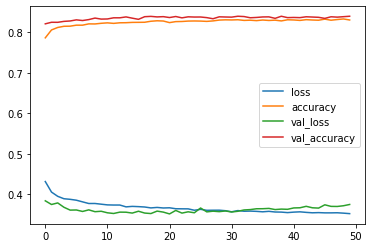

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(132, activation='relu', input_shape=(44,)),
    keras.layers.Dropout(.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(.4),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(.6),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs=50
)

history_to_plot = pd.DataFrame(history.history)
history_to_plot.plot()

print('')
print(f'Simple Neural Network = {model.evaluate(X_test, y_test)}')

### In this case accuracy of every model has icresed to 82-84%. Still neural network has best performance but only slightly. This shows that variables used in pervous simple models (age, educational num, hours per week and gender) are most important for the problem but some of other variables like race, martial status, occupation are still valiable for analysis and building models